In [12]:
import skimage.io as io
import sklearn.metrics
from sklearn.metrics import jaccard_score
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from tqdm import tqdm

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
def filter_pixel(img):
    mask_=img.copy()
    mask_[img>125]=1
    mask_[img<=125]=0
    return mask_

In [4]:
def c_metrics_score(predi,real):
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(real, predi).ravel()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    sensitivity=tp/(fn+tp)
    specifity=tn/(fp+tn)
    return accuracy,sensitivity,specifity

In [6]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

path=r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test_data_part_1_Lipos.txt'

f1 = open(path, "r")
Num=[]
Case=[]

a=f1.readline()
num_case=a[6:9]
Num=[]
Case=[]
lf1=0
for x in f1 :
    if RepresentsInt(x[6:9]) == True :    
        num_case=a[6:9]
        i=1
        while a[6:9]==num_case :
            i+=1
            a=f1.readline()
        Num.append(i)
        Case.append(num_case)
    elif RepresentsInt(x[6:8]) == True :    
        num_case=a[6:8]
        i=1
        while a[6:8]==num_case :
            i+=1
            a=f1.readline()
        Num.append(i)
        Case.append(num_case)
    elif RepresentsInt(x[6:7]) == True :    
        num_case=a[6:7]
        i=1
        while a[6:7]==num_case :
            i+=1
            a=f1.readline()
        Num.append(i)
        Case.append(num_case)
    lf1+=1

In [7]:
path=r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test_data_part_2_Lipos.txt'

f2 = open(path, "r")

lf2=0
for x in f2 :
        if RepresentsInt(x[13:16]) == True :    
            num_case=a[13:16]
            i=1
            Case.append(a[6:12]+'_'+num_case)
            while a[13:16]==num_case :
                i+=1
                a=f2.readline()
            Num.append(i)
        elif RepresentsInt(x[13:15]) == True :    
            num_case=a[13:15]
            i=1
            Case.append(a[6:12]+'_'+num_case)
            while a[13:15]==num_case :
                i+=1
                a=f2.readline()
            Num.append(i)
        elif RepresentsInt(x[13:14]) == True :    
            num_case=a[13:14]
            i=1
            Case.append(a[6:12]+'_'+str(num_case))
            while a[13:14]==num_case :
                i+=1
                a=f2.readline()
            Num.append(i)
        lf2+=1
r=Case.index("_")
del Case [r]
del Num [r]
Num[lf1]+=1

In [8]:
f2= open(r"C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test_data_part_2-1_Lipos.txt","w")
N=[]
for i in range (lf1,len(Case)):
    name='Lipos_'+Case[i]+'_GT_Zscore_slice_'
    for j in range (Num[i]) :
        if j < 100 :
            name1=name+'0'+str(j)+'.jpeg' 
        else : 
            name1=name+str(j)+'.jpeg' 
        f2.write(name1+'\n')
        N.append(name1)
f2.close()

In [28]:
def plot_Lipos(Cas) :
    h,k=0,Cas
    for i in range(k):
        h+=Num[i]
    IGT=I_GT[h:h+Num[k]]
    Ipred=I_pred[h:h+Num[k]]
    Ilabels=I_labels[h:h+Num[k]]
    j=1
    fig=plt.figure(figsize=(20, 20))
    fig.suptitle(Case[k],ha='center',va='center')
    for i in range (Num[k]) :
        img=IGT[i]
        figure(num=1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(7,5,j)
        j+=1
        mask_1=Ilabels[i]
        masked_1 = np.ma.masked_where(mask_1 == 0, mask_1)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked_1, interpolation='none', alpha=0.5,cmap='prism')
        plt.title("True Labels")
        plt.subplot(7,5,j)
        j+=1
        mask=Ipred[i]
        masked = np.ma.masked_where(mask == 0, mask)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked, 'jet', interpolation='none', alpha=0.5)
        plt.title("Unet-Mask")

In [10]:
I_pred=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-masks_Lipos.tif')
I_GT=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-volume_Lipos.tif')
I_labels=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-labels_Lipos.tif')

In [22]:
Accuracy=[]
Sensitivity=[]
Specifity=[]
Jaccard=[]
k=0
for j in tqdm(range(len(Num))):
    #cas
    test_ls=I_labels[k:k+Num[j]]
    test_ms=I_pred[k:k+Num[j]]
    k+=Num[j]
    Accu_l=[]
    Sensitivity_l=[]
    Specifity_l=[]
    jaccard_score_l=[]
    for i in range(Num[j]):
        #frame by frame for case
        predict=test_ms[i]
        real=test_ls[i]
        predict_=filter_pixel(predict)
        real_=filter_pixel(real)
        #flatten matrix
        predict_r=predict_.reshape(512*512)
        real_r=real_.reshape(512*512)
        Accu_l.append(c_metrics_score(predict_r,real_r)[0])
        Sensitivity_l.append(c_metrics_score(predict_r,real_r)[1])
        Specifity_l.append(c_metrics_score(predict_r,real_r)[2])
        jaccard_score_l.append(jaccard_score(predict_r,real_r))
    Accuracy.append(Accu_l)
    Sensitivity.append(Sensitivity_l)
    Specifity.append(Specifity_l)
    Jaccard.append(jaccard_score_l)

100%|██████████| 44/44 [12:43<00:00, 17.36s/it]


In [24]:
Cas=[]
Accuracy_mean=[]
Accuracy_std=[]
Sensitivity_mean=[]
Sensitivity_std=[]
Specifity_mean=[]
Specifity_std=[]
Jaccard_mean=[]
Jaccard_std=[]
for j in tqdm(range(len(Num))):
    Cas.append('Lipos_'+str(Case[j]))
    Accuracy_mean.append(statistics.mean(Accuracy[j]))
    Accuracy_std.append(statistics.stdev(Accuracy[j]))
    Sensitivity_mean.append(statistics.mean(Sensitivity[j]))
    Sensitivity_std.append(statistics.stdev(Sensitivity[j]))
    Specifity_mean.append(statistics.mean(Specifity[j]))
    Specifity_std.append(statistics.stdev(Specifity[j]))
    Jaccard_mean.append(statistics.mean(Jaccard[j]))
    Jaccard_std.append(statistics.stdev(Jaccard[j]))

Score_mean_by_case={'Cas':Cas,
    'Accuracy':Accuracy_mean,
    'Sensitivity':Sensitivity_mean,
    'Specifity':Specifity_mean,
    'Jaccard':Jaccard_mean  }
Score_std_by_case={'Cas':Cas,
    'Accuracy':Accuracy_std,
    'Sensitivity':Sensitivity_std,
    'Specifity':Specifity_std,
    'Jaccard':Jaccard_std  }
Score_mean_by_case=pd.DataFrame(Score_mean_by_case,columns=["Cas",'Accuracy','Sensitivity','Specifity','Jaccard'])
Score_std_by_case=pd.DataFrame(Score_std_by_case,columns=["Cas",'Accuracy','Sensitivity','Specifity','Jaccard'])

Score_mean_by_case=Score_mean_by_case.drop(9)
Score_std_by_case=Score_std_by_case.drop(9)
Score_mean_by_case

100%|██████████| 44/44 [00:00<00:00, 402.35it/s]


,Cas,Accuracy,Sensitivity,Specifity,Jaccard
0,Lipos_100,0.990606,0.948335,0.992011,0.822228
1,Lipos_16,0.994294,0.975925,0.995188,0.856688
2,Lipos_17,0.997791,0.962156,0.998088,0.819031
3,Lipos_30,0.986607,0.906401,0.991103,0.776456
4,Lipos_36,0.991957,0.929453,0.993127,0.711268
5,Lipos_38,0.998067,0.835814,0.999438,0.787769
6,Lipos_44,0.997913,0.968170,0.998438,0.851804
7,Lipos_47,0.997302,0.984087,0.997588,0.877817
8,Lipos_51,0.994557,0.971207,0.995398,0.831848
10,Lipos_59,0.971623,0.515169,0.995173,0.470904


In [25]:
Score_global={'Metric':["Accuracy","Sensitivity","Specifity","Jaccard"],
    'Moyenne':[Score_mean_by_case.Accuracy.mean(),Score_mean_by_case.Sensitivity.mean(),Score_mean_by_case.Specifity.mean(),Score_mean_by_case.Jaccard.mean()],
    'Deviation':[Score_std_by_case.Accuracy.std(),Score_std_by_case.Sensitivity.std(),Score_std_by_case.Specifity.std(),Score_std_by_case.Jaccard.std()],
  }
Score_global=pd.DataFrame(Score_global,columns=["Metric",'Moyenne','Deviation'])
Score_global

,Metric,Moyenne,Deviation
0,Accuracy,0.992646,0.005869
1,Sensitivity,0.877933,0.092668
2,Specifity,0.996849,0.002843
3,Jaccard,0.794070,0.075272


In [26]:
Score_best_mean_by_case=Score_mean_by_case.drop([35])
Score_best_global={'Metric':["Accuracy","Sensitivity","Specifity","Jaccard"],
    'Moyenne':[Score_best_mean_by_case.Accuracy.mean(),Score_best_mean_by_case.Sensitivity.mean(),Score_best_mean_by_case.Specifity.mean(),Score_best_mean_by_case.Jaccard.mean()],
    'Deviation':[Score_best_mean_by_case.Accuracy.std(),Score_best_mean_by_case.Sensitivity.std(),Score_best_mean_by_case.Specifity.std(),Score_best_mean_by_case.Jaccard.std()],
  }
Score_best_global=pd.DataFrame(Score_best_global,columns=["Metric",'Moyenne','Deviation'])
Score_best_global

,Metric,Moyenne,Deviation
0,Accuracy,0.992541,0.010752
1,Sensitivity,0.877036,0.127610
2,Specifity,0.996813,0.003023
3,Jaccard,0.793459,0.125124


num must be 1 <= num <= 35, not 36


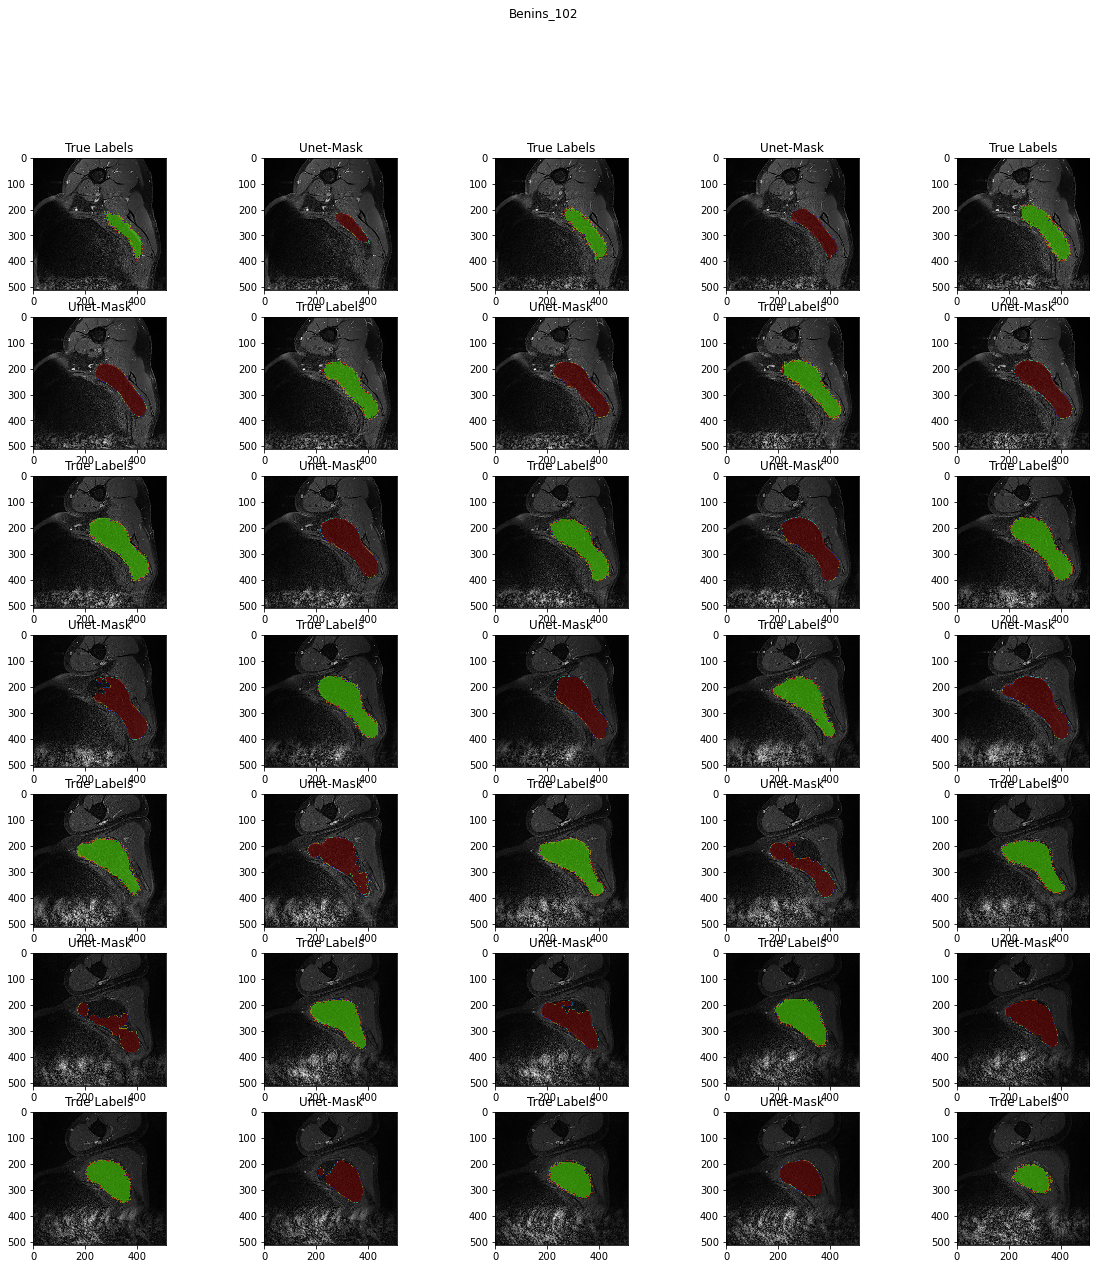

In [31]:
try:
    plot_Lipos(18)
except Exception as e:
    print(e)

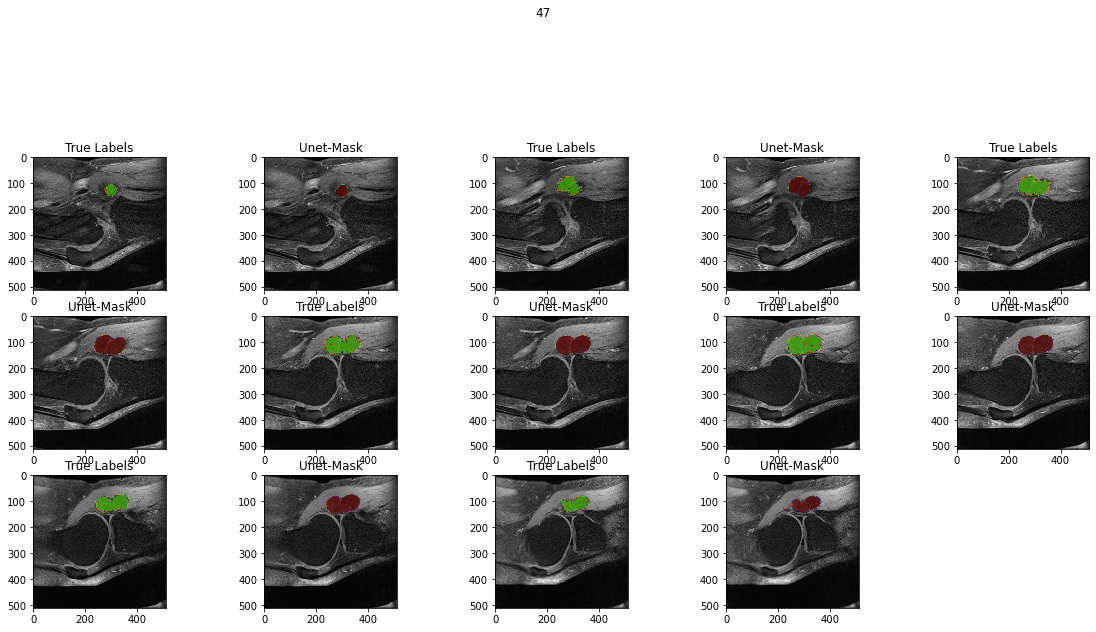

In [32]:
try:
    plot_Lipos(7)
except Exception as e:
    print(e)

num must be 1 <= num <= 35, not 36


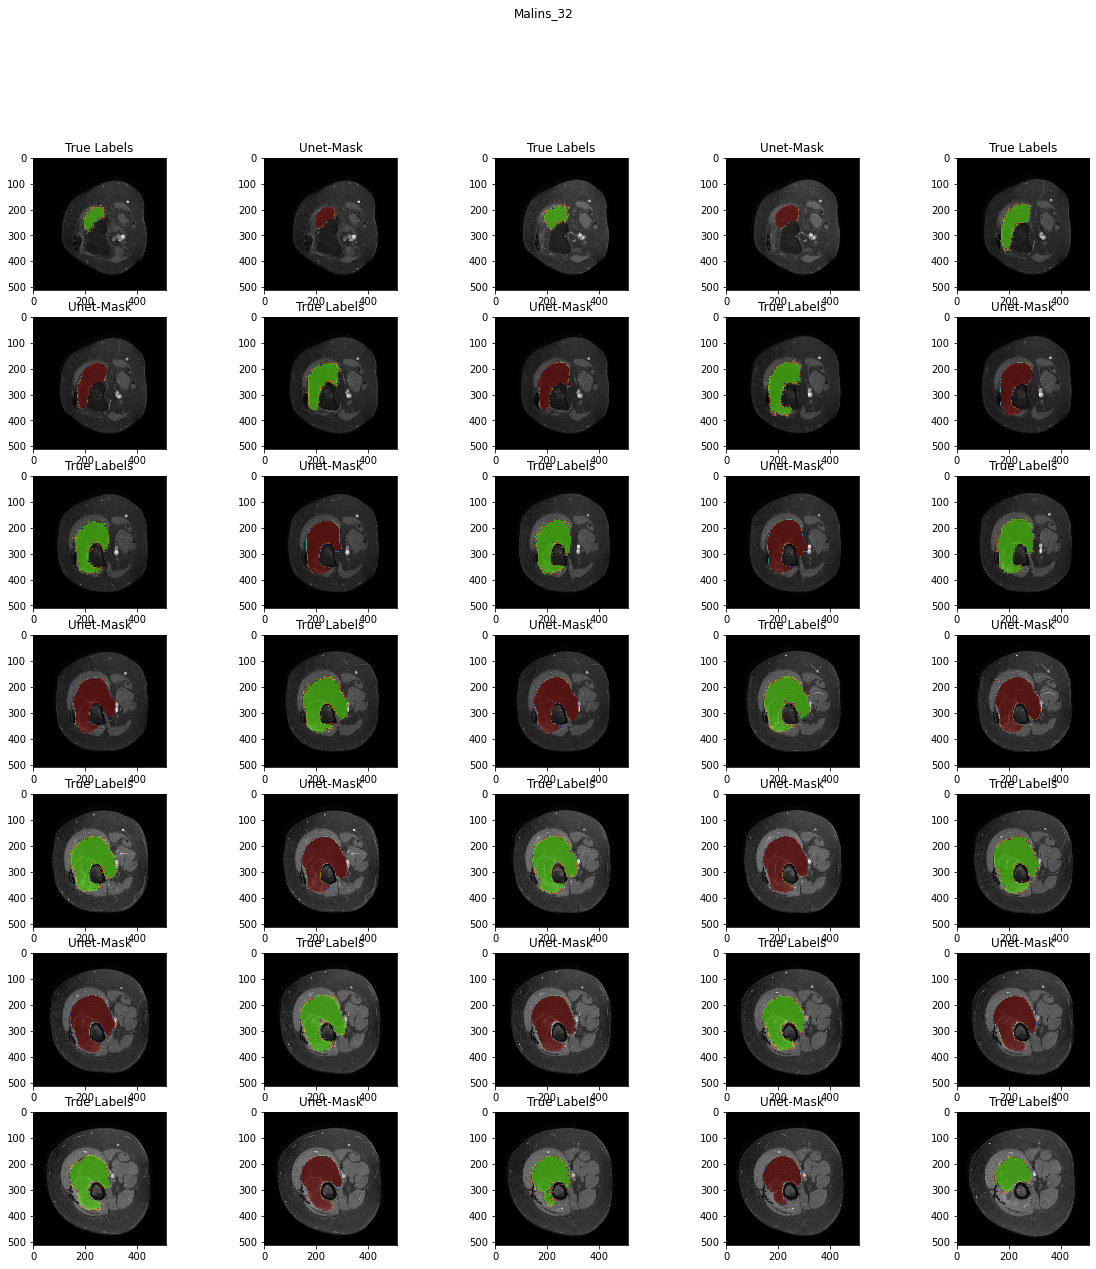

In [33]:
try:
    plot_Lipos(39)
except Exception as e:
    print(e)

In [ ]:
#Create Masks
import os
path=r'C:\Users\zelmouaffek\Desktop\Masks_Unet'
I_pred=io.imread('C:\\Users\\zelmouaffek\\Desktop\\test-masks.tif')
I_GT=io.imread('C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\test-labels.tif')
I=io.imread('C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\test-volume.tif')

i=0
for j in range (len(Case)):
    save_path=os.path.join(path,str(Case[j]))
    GT='GT_'+str(Case[j])+'.tif'
    Pred='Pred_Unet_'+str(Case[j])+'.tif'
    Cas='Case_'+str(Case[j])+'.tif'
    io.imsave(os.path.join(save_path,GT),I_GT[i:i+Num[j]])
    io.imsave(os.path.join(save_path,Pred),I_pred[i:i+Num[j]])
    io.imsave(os.path.join(save_path,Cas),I[i:i+Num[j]])
    i+=Num[j]
